Student id: m.kirankumar.2@gmail.com<br/>
Date: May 23, 2022

**7. For this problem, use the population dataset, and perform the following:**<br/>
1.	EDA on the time series to find trends and seasonality.<br/>
2.	Forecast the population on the given dataset for the next 6 months. 


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load popdata.csv into DataFrame

In [4]:
population = pd.read_csv('popdata.csv')

Population information of data

In [5]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   816 non-null    float64
 1   date    816 non-null    object 
dtypes: float64(1), object(1)
memory usage: 12.9+ KB


**date is of object/string type. Thus it requires to be type casted to pandas datatime**

In [8]:
population['date'] = pd.to_datetime(population['date'])

In [9]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   value   816 non-null    float64       
 1   date    816 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.9 KB


In [10]:
population.head(5)

value       date
0  127299.0 1952-01-01
1  127517.0 1952-02-01
2  127721.0 1952-03-01
3  127933.0 1952-04-01
4  128130.0 1952-05-01

Let's plot the Population value column graph

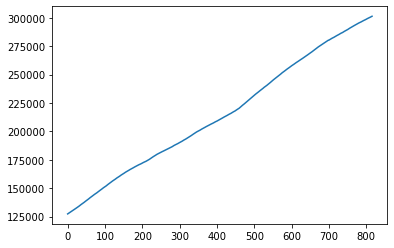

In [12]:
plt.plot(population['value'])
plt.show()

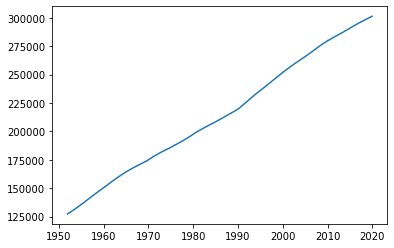

In [13]:
plt.plot(population['date'],population['value'])
plt.show()

Trend estimation using pandas rolling function (for duration of month) <br/>
Basically moving averages(MA)
<br/>
<br/>
Note : rolling(1) is for  1 month

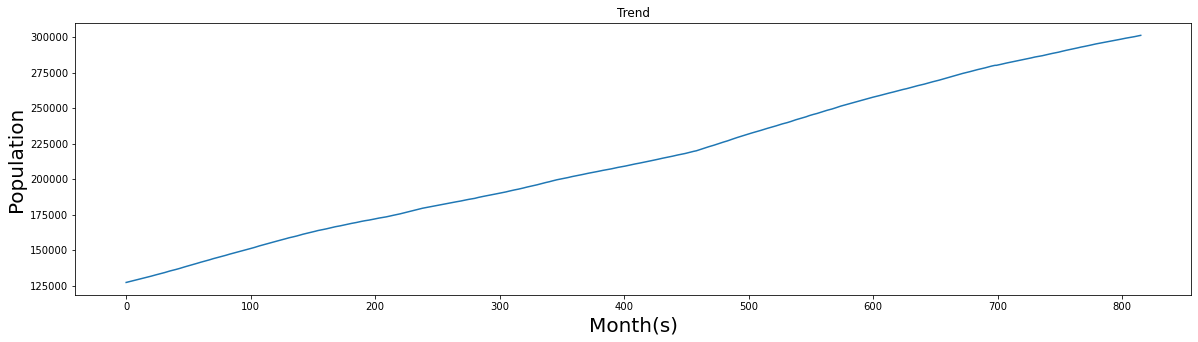

In [14]:
pop_val = population.value.rolling(1).mean()
plt.figure(figsize=(20,5))
plt.plot(pop_val)
plt.xlabel("Month(s)", fontsize=20)
plt.ylabel("Population",fontsize=20)
plt.title("Trend")
plt.show()

Seasonality

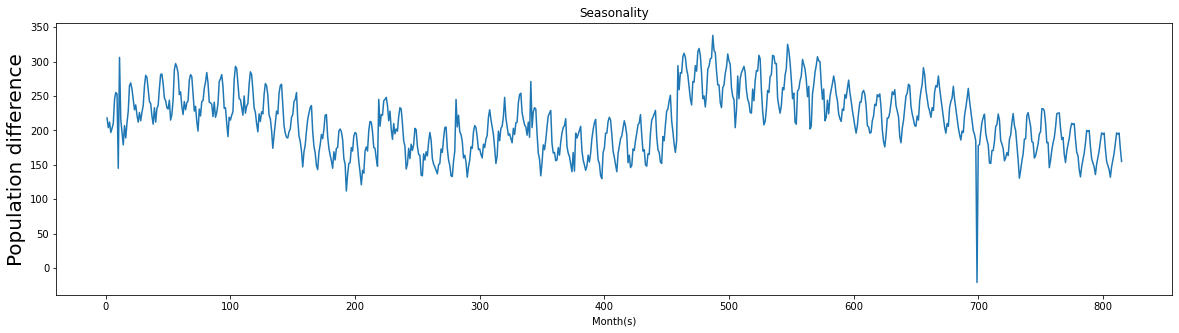

In [15]:
seasonality =population.value.diff(1)
plt.figure(figsize = (20, 5))
plt.plot(seasonality)
plt.xlabel("Month(s)")
plt.ylabel("Population difference",fontsize=20)
plt.title("Seasonality")
plt.show()

Now, Lets plot ACF(Auto Correlation)

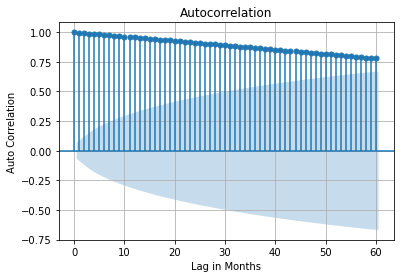

In [72]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(population['value'], lags=60)
plt.xlabel('Lag in Months')
plt.ylabel("Auto Correlation")
plt.grid()
plt.show()

**Inference :** Clearly from the above auto correlation plot, we can fairly conclude that for 10 months, the change in auto correlation is significantly low (as good as unchanged) thus there is a better scope for predictability (with error in predction minimal or at least in acceptable range) of population for 6 Month scope

In [ ]:
#ARIMA

In [101]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split

In [104]:
X_train, X_test, y_train, y_test = train_test_split(
    population['date'], population['value'], test_size=0.20, random_state=42)

In [106]:
model = SARIMAX(y_train, 
                order = (0, 1, 1))

C:\Users\kiran.motheram\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\kiran.motheram\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


In [100]:
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                  816
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -5114.456
Date:                Thu, 19 May 2022   AIC                          10232.912
Time:                        17:18:45   BIC                          10242.318
Sample:                             0   HQIC                         10236.522
                                - 816                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.8953      0.014     62.943      0.000       0.867       0.923
sigma2       1.21e+04    325.092     37.231      0.000    1.15e+04    1.27e+04
===================================================================================
Ljung-Box (L1) (Q):                 182.57   Jarque-Bera (JB):            371132.28
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.74   Skew:                            -4.76
Prob(H) (two-sided):                  0.01   Kurtosis:                       107.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<bound method DataFrame.to_numpy of           date       value
0   1952-01-01  127299.000
1   1952-02-01  127517.000
2   1952-03-01  127721.000
3   1952-04-01  127933.000
4   1952-05-01  128130.000
..         ...         ...
811 2019-08-01  300581.333
812 2019-09-01  300775.872
813 2019-10-01  300972.035
814 2019-11-01  301144.949
815 2019-12-01  301299.946

[816 rows x 2 columns]>